Plot the signal yield vs the number of $Z^0$

In [1]:
import pandas
import uproot
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as interpolate
import pickle

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Roman']})
rc('text', usetex=True)
params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"

/Users/mariehartmann/opt/anaconda3/envs/myenv38/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [3]:
#Dowloading the data
bc_tree = uproot.open('root://eospublic.cern.ch//eos/experiment/fcc/ee/analyses/case-studies/flavour/Bc2TauNu/flatNtuples/spring2021/prod_04/Analysis_stage2/p8_ee_Zbb_ecm91_EvtGen_Bc2TauNuTAUHADNU.root')['events']
bu_tree = uproot.open('root://eospublic.cern.ch//eos/experiment/fcc/ee/analyses/case-studies/flavour/Bc2TauNu/flatNtuples/spring2021/prod_04/Analysis_stage2/p8_ee_Zbb_ecm91_EvtGen_Bu2TauNuTAUHADNU.root')['events']
bb_tree = uproot.open('root://eospublic.cern.ch//eos/experiment/fcc/ee/analyses/case-studies/flavour/Bc2TauNu/flatNtuples/spring2021/prod_04/Analysis_stage2/p8_ee_Zbb_ecm91_EvtGen.root')['events']
cc_tree = uproot.open('root://eospublic.cern.ch//eos/experiment/fcc/ee/analyses/case-studies/flavour/Bc2TauNu/flatNtuples/spring2021/prod_04/Analysis_stage2/p8_ee_Zcc_ecm91.root')['events']

tree_gen = uproot.open("root://eospublic.cern.ch//eos/experiment/fcc/ee/analyses/case-studies/flavour/Bc2TauNu/flatNtuples/spring2021/prod_04/Analysis_stage2/p8_ee_Zbb_ecm91_EvtGen_Bc2TauNuTAUHADNU.root")["metadata"]

## Initializatoin of the yield and yield errors

a = np.array([4,2,5])
b = np.array([2,1,5])
print(a/b)

In [4]:
N_bkg = np.array([0.1, 0.25, 1, 5, 10])

In [6]:
N_SIG_10 = 4009.2649482816005*10
sig_yield_10 = 4004
err_sig_yield_10 = 239.5

N_SIG_5 = 4009.2649482816005*5
sig_yield_5 = 4011
err_sig_yield_5 = 190.3

N_SIG_1 = 4009.2649482816005
sig_yield_1 = 4010
err_sig_yield_1 = 125.2

N_SIG_0_25 = 4009.2649482816005*0.25
sig_yield_0_25 = 4011
err_sig_yield_0_25 = 103.4

N_SIG_0_1 = 4009.2649482816005*0.1
sig_yield_0_1 = 4008
err_sig_yield_0_1 = 98

N_SIG = np.array([N_SIG_0_1, N_SIG_0_25, N_SIG_1, N_SIG_5, N_SIG_10])
SIG = np.array([sig_yield_0_1, sig_yield_0_25, sig_yield_1, sig_yield_5, sig_yield_10])
ERR_SIG = np.array([err_sig_yield_0_1, err_sig_yield_0_25, err_sig_yield_1, err_sig_yield_5, err_sig_yield_10])

REL_PREC_SIG = ERR_SIG/SIG

N_BU_BKG_5e12 = 241.47796710240002
bu_bkg_yield_5e12 = 241.6
err_bu_bkg_yield_5e12 = 5.638

N_BU_BKG_4e12 = 193.18237368191998
bu_bkg_yield_4e12 = 193.8
err_bu_bkg_yield_4e12 = 5.21

N_BU_BKG_3e12 = 144.88678026144
bu_bkg_yield_3e12 = 144.7
err_bu_bkg_yield_3e12 = 4.232

N_BU_BKG_2e12 = 96.59118684095999
bu_bkg_yield_2e12 = 96.89
err_bu_bkg_yield_2e12 = 3.47

N_BU_BKG_1e12 = 48.295593420479996
bu_bkg_yield_1e12 = 48.3
err_bu_bkg_yield_1e12 = 2.444

N_BU_BKG_5e11 = 24.147796710239998
bu_bkg_yield_5e11 = 24.18
err_bu_bkg_yield_5e11 = 1.545

N_BU = np.array([N_BU_BKG_5e11, N_BU_BKG_1e12, N_BU_BKG_2e12, N_BU_BKG_3e12, N_BU_BKG_4e12, N_BU_BKG_5e12])
BU = np.array([bu_bkg_yield_5e11, bu_bkg_yield_1e12, bu_bkg_yield_2e12, bu_bkg_yield_3e12, bu_bkg_yield_4e12, bu_bkg_yield_5e12])
ERR_BU = np.array([err_bu_bkg_yield_5e11, err_bu_bkg_yield_1e12, err_bu_bkg_yield_2e12, err_bu_bkg_yield_3e12, err_bu_bkg_yield_4e12, err_bu_bkg_yield_5e12])

N_INC_BKG_5e12 = 4231.413002270805
inc_bkg_yield_5e12 = 4227
err_inc_bkg_yield_5e12 = 126.3

N_INC_BKG_4e12 = 3385.130401816644
inc_bkg_yield_4e12 = 3380
err_inc_bkg_yield_4e12 = 110.5

N_INC_BKG_3e12 = 2538.8478013624826
inc_bkg_yield_3e12 = 2537
err_inc_bkg_yield_3e12 = 96.21

N_INC_BKG_2e12 = 1692.565200908322
inc_bkg_yield_2e12 = 1689
err_inc_bkg_yield_2e12 = 79.08

N_INC_BKG_1e12 = 846.282600454161
inc_bkg_yield_1e12 = 844.4
err_inc_bkg_yield_1e12 = 55.41

N_INC_BKG_5e11 = 423.1413002270805
inc_bkg_yield_5e11 = 424
err_inc_bkg_yield_5e11 = 40.4

N_INC_BKG = np.array([N_INC_BKG_5e11, N_INC_BKG_1e12, N_INC_BKG_2e12, N_INC_BKG_3e12, N_INC_BKG_4e12, N_INC_BKG_5e12])
INC_BKG = np.array([inc_bkg_yield_5e11, inc_bkg_yield_1e12, inc_bkg_yield_2e12, inc_bkg_yield_3e12, inc_bkg_yield_4e12, inc_bkg_yield_5e12])
ERR_INC_BKG = np.array([err_inc_bkg_yield_5e11, err_inc_bkg_yield_1e12, err_inc_bkg_yield_2e12, err_inc_bkg_yield_3e12, err_inc_bkg_yield_4e12, err_inc_bkg_yield_5e12])

## Yield vs N($Z^0$)

In [7]:
name_bc = r"$B_c^+$ $\rightarrow$ $\tau^+$ $\nu_\tau$ "
name_bu = r"$B^+$ $\rightarrow$ $\tau^+$ $\nu_\tau$ "
name_bb = r"$Z^0$ $\rightarrow$ $b\bar{b}$ "
name_cc = r"$Z^0$ $\rightarrow$ $c\bar{c}$ "

colour_bc = "#fdae61"
colour_bu = "#74add1"
colour_bb_cc = "#4575b4"

### Signal yield vs number of $Z^0$

In [8]:
plt.figure(figsize=(10,6))

#Yield and errors obtained with the fits for the optimized cut
plt.errorbar(N_bkg, 
             SIG, 
             yerr = ERR_SIG,
             fmt = 'o', 
             markersize = 2,
             color = 'black', #colour_bc, 
             label = "Fit value"
             )

#Theoretical yield value for the optimized cut
plt.plot(N_bkg,
         N_SIG,
         color = colour_bc, 
         label = "Theoretical value"
        )

plt.xlabel("Number of background events for N($Z^0$)=5e12", fontsize=15, labelpad=10)
plt.ylabel(r"$B_c^+$ $\rightarrow$ $\tau^+$ $\nu_\tau$ signal yield", fontsize=15, labelpad=10)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=13)

plt.plot()

[]

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
KQ: bad file descriptor polling for events




<Figure size 720x432 with 1 Axes>

### $B^+$ yield vs number of $Z^0$

plt.figure(figsize=(10,6))

#Yield and errors obtained with the fits for the optimized cut
plt.errorbar(N_Z0, 
             BU, 
             yerr = ERR_BU,
             fmt = 'o', 
             markersize = 2,
             color = "black", 
             label = "Fit value"
             )

#Theoretical yield value for the optimized cut
plt.plot(N_Z0,
         N_BU,
         color = colour_bu, 
         label = "Theoretical value"
        )

plt.xlabel("Number of $Z^0$ bosons", fontsize=15, labelpad=10)
plt.ylabel(r"$B^+$ $\rightarrow$ $\tau^+$ $\nu_\tau$ yield", fontsize=15, labelpad=10)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=13)

plt.plot()

### $Z^0$ $\rightarrow$ $b\bar{b}$ and $Z^0$ $\rightarrow$ $c\bar{c}$ background yield vs number of $Z^0$

plt.figure(figsize=(10,6))

#Yield and errors obtained with the fits for the optimized cut
plt.errorbar(N_Z0, 
             INC_BKG, 
             yerr = ERR_INC_BKG,
             fmt = 'o', 
             markersize = 2,
             color = 'black', 
             label = "Fit value"
             )

#Theoretical yield value for the optimized cut
plt.plot(N_Z0,
         N_INC_BKG,
         color = colour_bb_cc, 
         label = "Theoretical value"
        )

plt.xlabel("Number of $Z^0$ bosons", fontsize=15, labelpad=10)
plt.ylabel(r"$Z^0$ $\rightarrow$ $b\bar{b}$ and $Z^0$ $\rightarrow$ $c\bar{c}$ background yield ", fontsize=15, labelpad=10)
#plt.xscale('log')
#plt.yscale('log')

plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=13)

plt.plot()

## Relative precision vs number of $Z^0$ bosons

No handles with labels found to put in legend.


[]

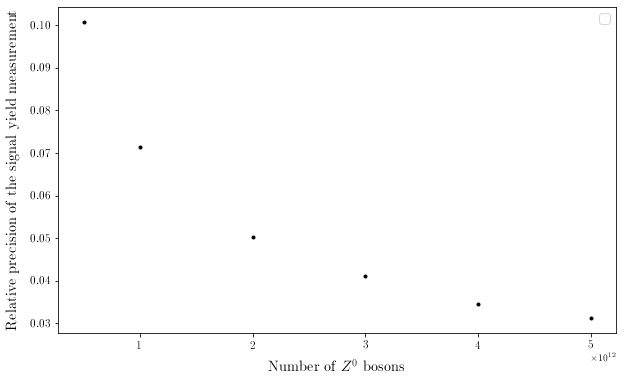

In [58]:
plt.figure(figsize=(10,6))

#Yield and errors obtained with the fits for the optimized cut
plt.errorbar(N_Z0, 
             REL_PREC_SIG, 
             fmt = 'o', 
             markersize = 3,
             color = colour_bc
             #label = "Fit value"
             )


plt.xlabel("Number of background events for N($Z^0$)=5e12", fontsize=15, labelpad=10)
plt.ylabel(r"Relative precision of the signal yield", fontsize=15, labelpad=10)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=13)

plt.plot()

## Plot with systematic uncertainties 

In [62]:
X = np.array([0, 0.25, 0.5, 0.75, 1])
TOT_ERR = np.sqrt(ERR_SIG**2 + (X*ERR_SIG)**2)

ValueError: operands could not be broadcast together with shapes (5,) (6,) 

[]

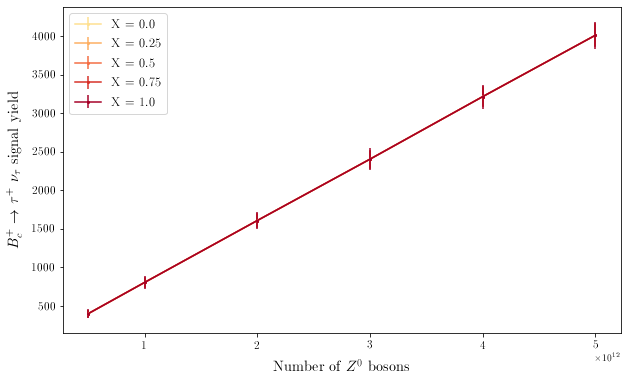

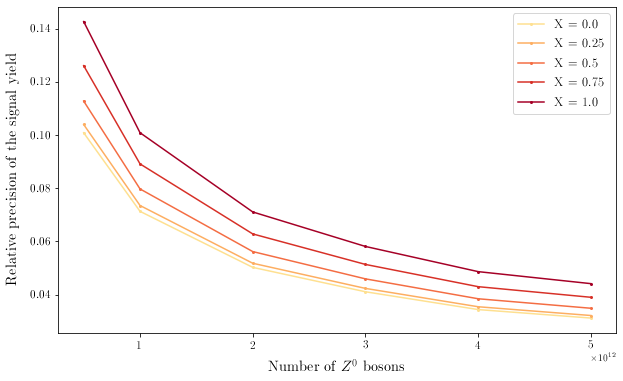

In [69]:
X = np.array([0, 0.25, 0.5, 0.75, 1])
colour = ["#fee090", "#fdae61", "#f46d43", "#d73027", "#a50026"]

plt.figure(figsize=(10,6))

for i in range (len(X)) :
    TOT_ERR = np.sqrt(ERR_SIG**2 + (X[i]*ERR_SIG)**2)
    
    plt.errorbar(N_Z0, 
             SIG, 
             yerr = TOT_ERR,
             fmt = 'o', 
             ls = 'solid',
             markersize = 2,
             color = colour[i], 
             label = "X = {}".format(X[i])
             )


plt.xlabel("Number of background events for N($Z^0$)=5e12", fontsize=15, labelpad=10)
plt.ylabel(r"$B_c^+$ $\rightarrow$ $\tau^+$ $\nu_\tau$ signal yield", fontsize=15, labelpad=10)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=13)

plt.plot()

plt.figure(figsize=(10,6))

for i in range (len(X)) :
    TOT_ERR = np.sqrt(ERR_SIG**2 + (X[i]*ERR_SIG)**2)
    
    plt.errorbar(N_Z0, 
             TOT_ERR/SIG, 
             fmt = 'o', 
             ls = 'solid',
             markersize = 2,
             color = colour[i], 
             label = "X = {}".format(X[i])
             )

plt.xlabel("Number of background events for N($Z^0$)=5e12", fontsize=15, labelpad=10)
plt.ylabel(r"Relative precision of the signal yield", fontsize=15, labelpad=10)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=13)

plt.plot()

X = np.array([0, 0.25, 0.5, 0.75, 1])
colour = ["#e0f3f8", "#abd9e9", "#74add1", "#4575b4", "#313695"]

plt.figure(figsize=(10,6))

for i in range (len(X)) :
    TOT_ERR = np.sqrt(ERR_INC_BKG**2 + (X[i]*ERR_INC_BKG)**2)
    
    plt.errorbar(N_Z0, 
             TOT_ERR/INC_BKG, 
             fmt = 'o', 
             ls = 'solid',
             markersize = 2,
             color = colour[i], 
             label = "X = {}".format(X[i])
             )

plt.xlabel("Number of background events for N($Z^0$)=5e12", fontsize=15, labelpad=10)
plt.ylabel(r"Relative precision for the $Z^0$$\rightarrow$$b\bar{b}$ and $Z^0$$\rightarrow$$c\bar{c}$ yield", fontsize=15, labelpad=10)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=13)

plt.plot()

X = np.array([0, 0.25, 0.5, 0.75, 1])
colour = ["#e0f3f8", "#abd9e9", "#74add1", "#4575b4", "#313695"]

plt.figure(figsize=(10,6))

for i in range (len(X)) :
    TOT_ERR = np.sqrt(ERR_BU**2 + (X[i]*ERR_BU)**2)
    
    plt.errorbar(N_Z0, 
             TOT_ERR/BU, 
             fmt = 'o', 
             ls = 'solid',
             markersize = 2,
             color = colour[i], 
             label = "X = {}".format(X[i])
             )

plt.xlabel("Number of $Z^0$ bosons", fontsize=15, labelpad=10)
plt.ylabel(r"Relative precision for the $B^+$ $\rightarrow$ $\tau^+$ $\nu_\tau$ yield", fontsize=15, labelpad=10)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=13)

plt.plot()